# Using Ensembled Decision Trees to predict Heart Disease 
### Matthew Martin

This Project uses the Behavioral Risk Factor Surveillance System (BRFSS) is a health-related telephone survey that is collected annually by the CDC, in order to predict and classify Heart Disease using a sample size of 253,680 response and 330 features.

## Problem Description
Supervised Learning task: binary classification
Goal: predict whether an indiovudal has or had heart disease based on their BRFSS survey responses

## Part 1: Data Description, Selecting the dataset, and EDA. 

### Dataset Description:
The data is sourced from a Kaggle dataset, linked here: https://www.kaggle.com/datasets/alexteboul/heart-disease-health-indicators-dataset/data. 

The data is from the 2015 CDC survey and since it is currently 2025, the data may qualify as not current, since it is about a decade old. I did more exploration of datasets and found a more recent BRFSS survey , performed in 2022.

Heart Disease Health Indicators Dataset : https://www.kaggle.com/datasets/alexteboul/heart-disease-health-indicators-dataset/data

number of features: 40 (instead of 300)

number of samples: 400K

there are two versions, one with Nans cleaned , and once without. I will use the No Nans and perform any additional EDA necessary.  

Note: the classes are unbalanced, with most of the responses being no for Heart Disease, so there will be some weighting adjustments necessary. 


In [33]:
import math
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import seaborn as sns

# importing all the required libraries

from math import exp
import numpy as np
import pandas as pd
import sklearn 
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# read the data in 
df = pd.read_csv("data/heart_2022_no_nans.csv")
df

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
1,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
3,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
4,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,...,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103832,Michigan,Female,Good,0.0,30.0,Within past year (anytime less than 12 months ...,Yes,10.0,1 to 5,No,...,1.75,66.68,21.71,No,Yes,Yes,No,"Yes, received Tdap",No,Yes
103833,Michigan,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,1.65,63.50,23.30,No,Yes,Yes,No,"Yes, received Tdap",No,No
103834,Michigan,Male,Good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,1.73,99.79,33.45,Yes,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
103835,Michigan,Male,Excellent,1.0,1.0,Within past year (anytime less than 12 months ...,Yes,7.0,None of them,No,...,1.75,65.77,21.41,Yes,No,No,No,"Yes, received tetanus shot, but not Tdap",No,No


In [3]:
# get all the column types and names

In [4]:
# Get the data types of all columns - note objects are usually strings or mixed types. from the code can conclude most of these are strings with a yes or no value. 
column_dtypes = df.dtypes
column_dtypes

State                         object
Sex                           object
GeneralHealth                 object
PhysicalHealthDays           float64
MentalHealthDays             float64
LastCheckupTime               object
PhysicalActivities            object
SleepHours                   float64
RemovedTeeth                  object
HadHeartAttack                object
HadAngina                     object
HadStroke                     object
HadAsthma                     object
HadSkinCancer                 object
HadCOPD                       object
HadDepressiveDisorder         object
HadKidneyDisease              object
HadArthritis                  object
HadDiabetes                   object
DeafOrHardOfHearing           object
BlindOrVisionDifficulty       object
DifficultyConcentrating       object
DifficultyWalking             object
DifficultyDressingBathing     object
DifficultyErrands             object
SmokerStatus                  object
ECigaretteUsage               object
C

## Distributions:
based off some of the features , I think that some of the most important features that could be correlated with a positive classification ( heart disease) are features like smokerstatus, alcohol drinkers, age, BMI and even CovidPos. 

I want to visualize the distributions using a bunch of histograms 


In [5]:
# get the numerical features and ordinal/categorical features
num_features = [
    'PhysicalHealthDays', 'MentalHealthDays',
    'SleepHours', 'HeightInMeters',
    'WeightInKilograms', 'BMI'
]

cat_features = [
    'Sex', 'GeneralHealth', 'LastCheckupTime', 'PhysicalActivities',
    'RemovedTeeth', 'SmokerStatus', 'ECigaretteUsage', 'ChestScan',
    'RaceEthnicityCategory', 'AgeCategory', 'AlcoholDrinkers',
    'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
    'HighRiskLastYear', 'CovidPos'
]

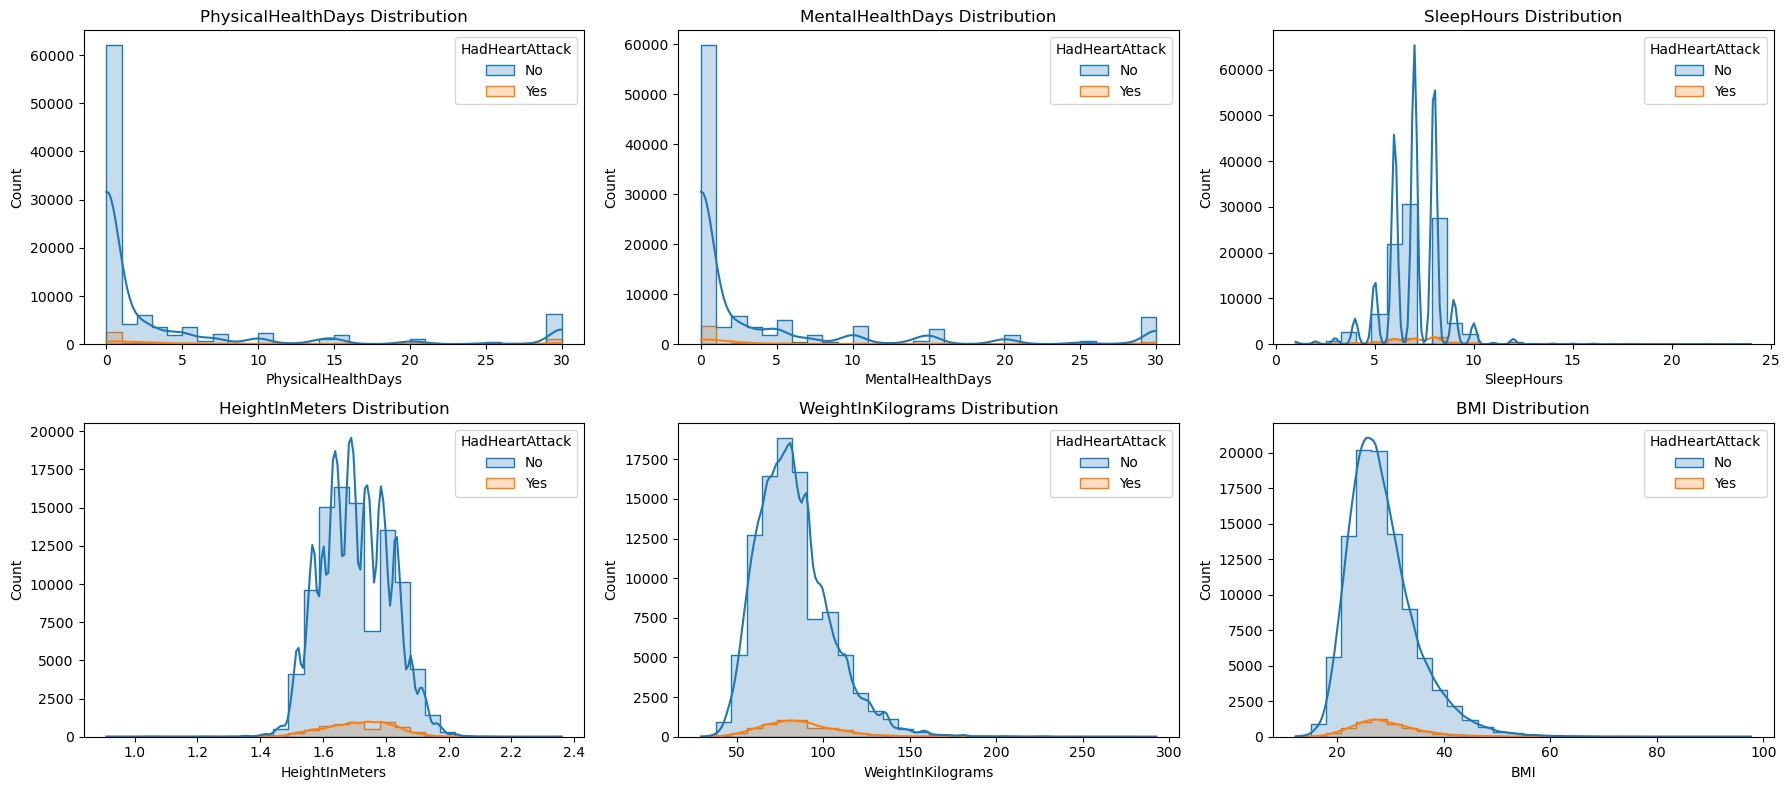

In [6]:
fig, axes = plt.subplots(2, 3, figsize=(18, 8))
axes = axes.flatten()
for i, feature in enumerate(num_features):
    sns.histplot(data=df, x=feature, hue='HadHeartAttack', bins=30, kde=True, ax=axes[i], element='step')
    axes[i].set_title(f'{feature} Distribution')

plt.tight_layout()
plt.show()

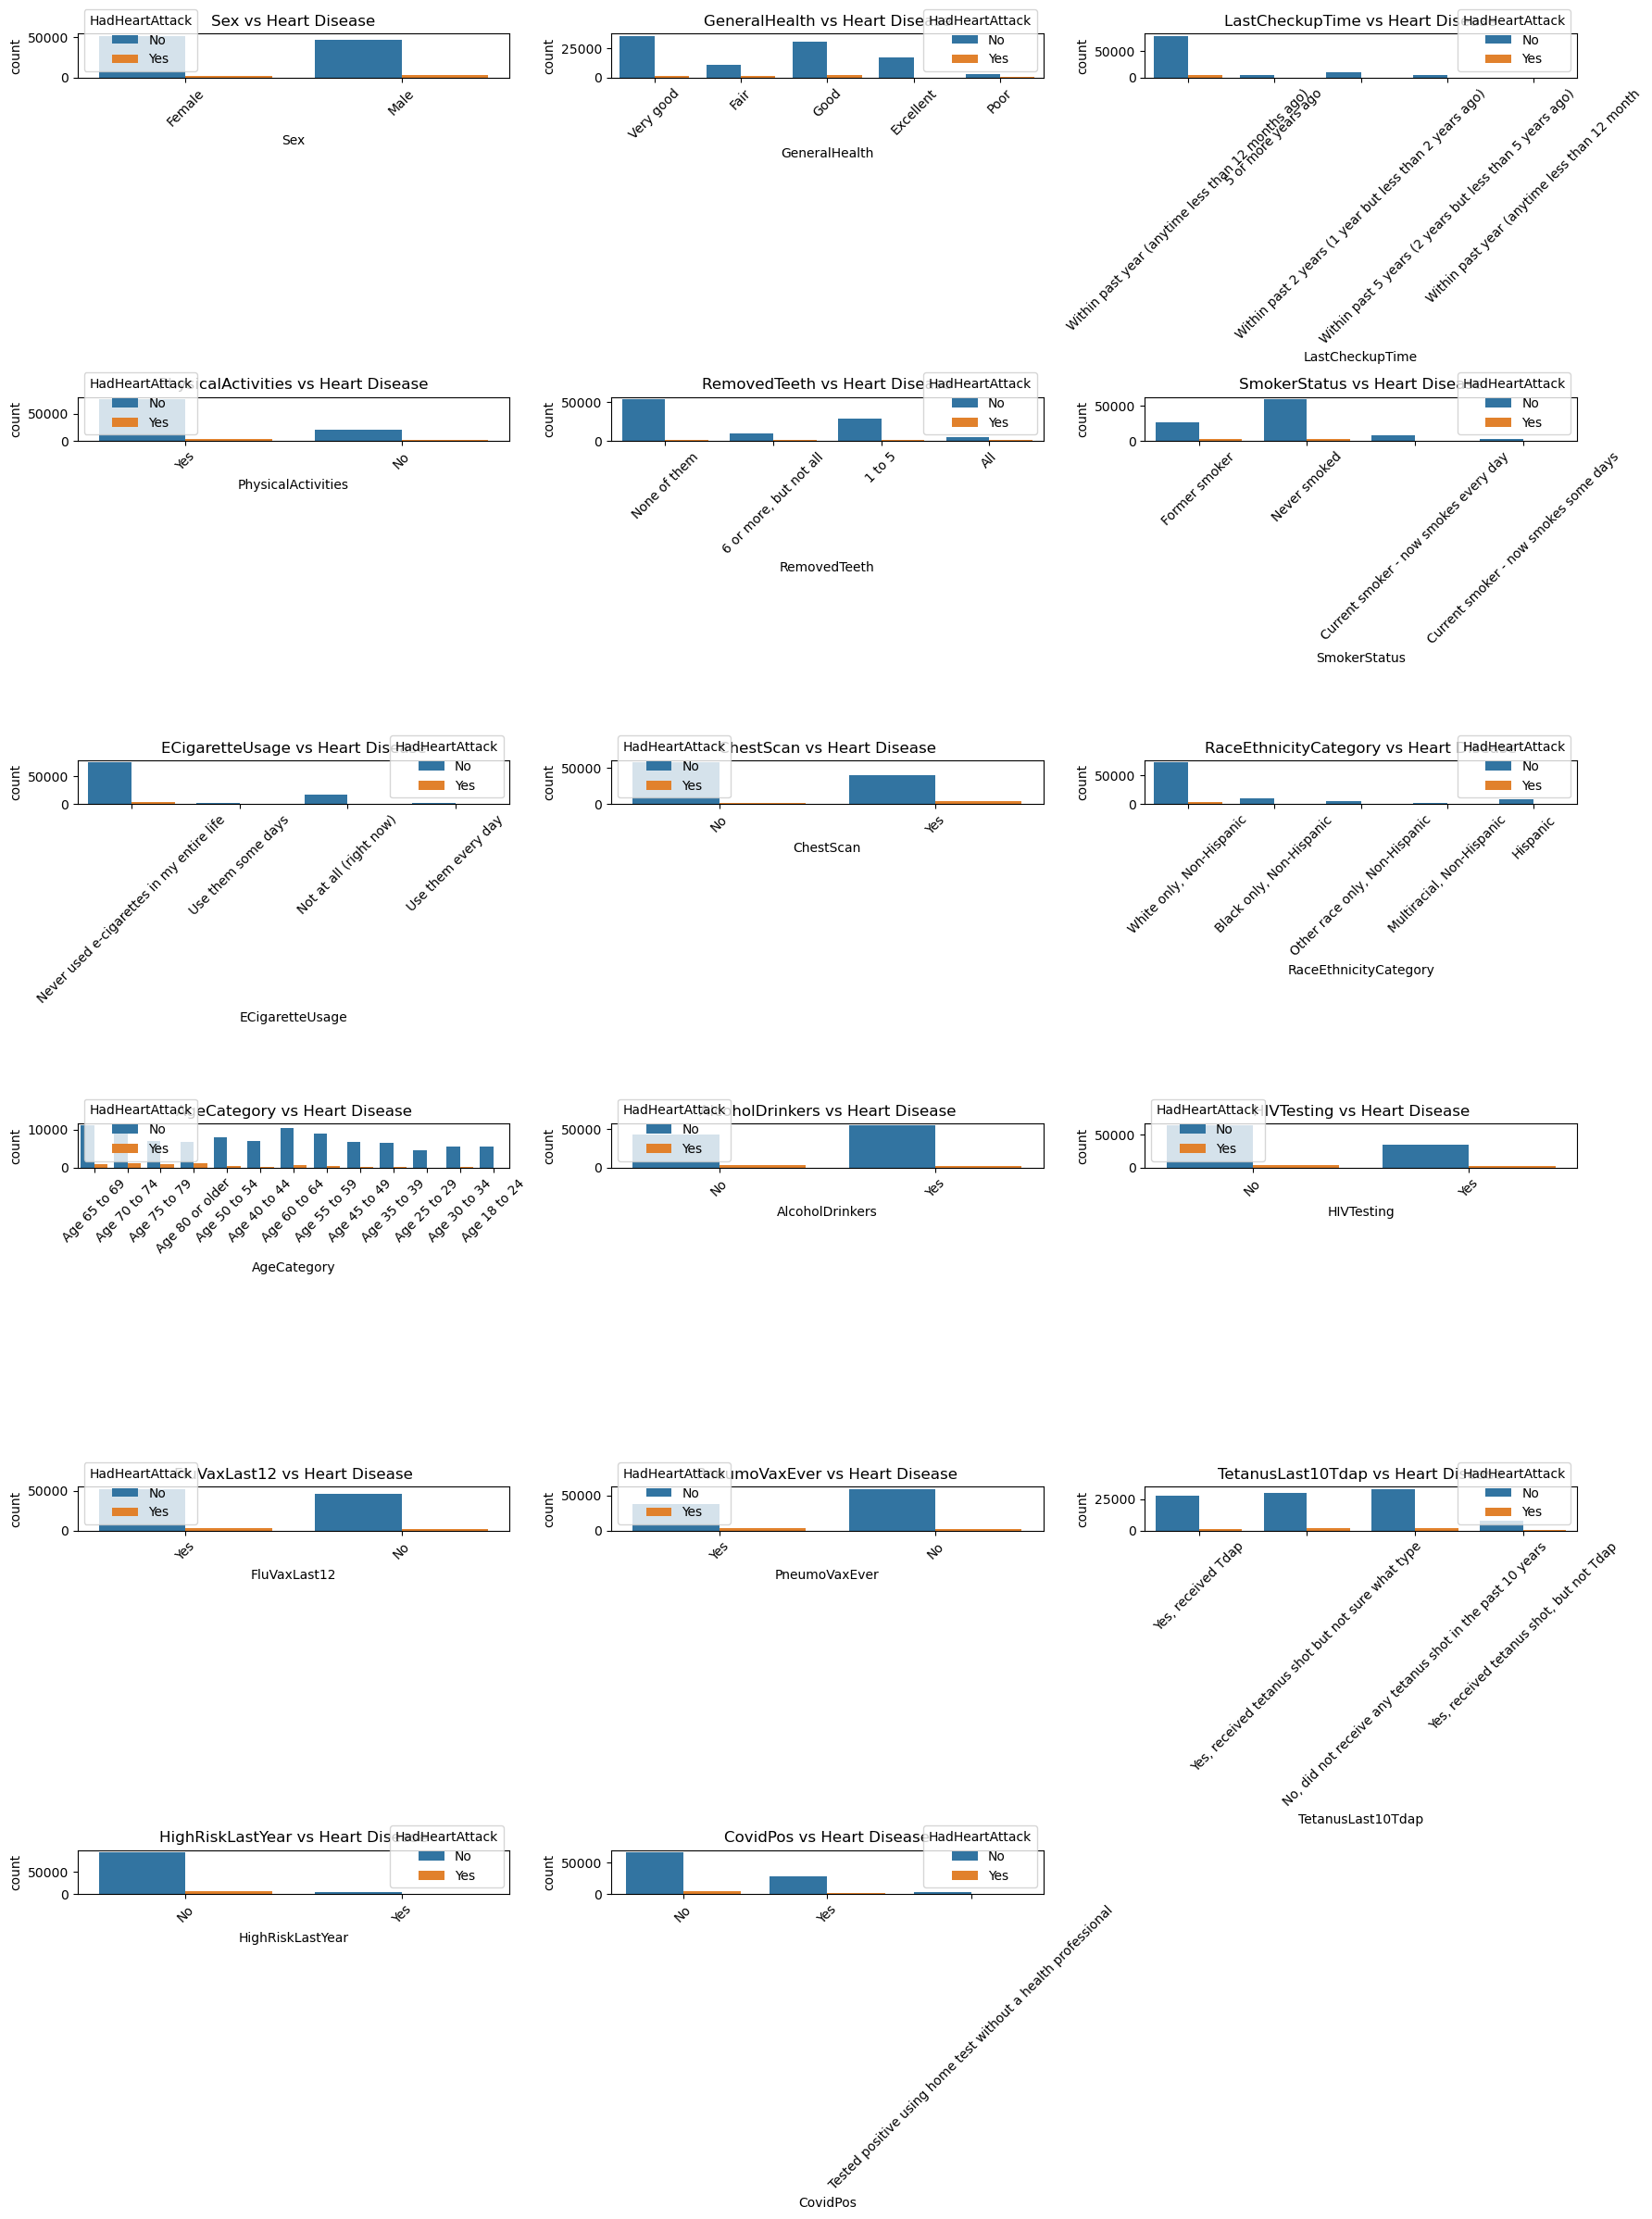

In [7]:


cols = 3
rows = math.ceil(len(cat_features) / cols)

fig, axes = plt.subplots(rows, cols, figsize=(6 * cols, 4 * rows))
axes = axes.flatten()

for i, feature in enumerate(cat_features):
    sns.countplot(data=df, x=feature, hue='HadHeartAttack', ax=axes[i])
    axes[i].set_title(f'{feature} vs Heart Disease')
    axes[i].tick_params(axis='x', rotation=45)

# Hide unused axes if any
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

# Class Balance:
One of the issues I am facing in this dataset is that most of the responses for HadHeartAttack is no. only a very small amount have heart disease which makes yes the minority class. We will have to address this with either oversampling or undersampling. 

note: 

oversampling: increases the number of instances in the minority class.

undersampling: Reduces the number of instances in the majority class.

No     98101
Yes     5735
Name: HadHeartAttack, dtype: int64


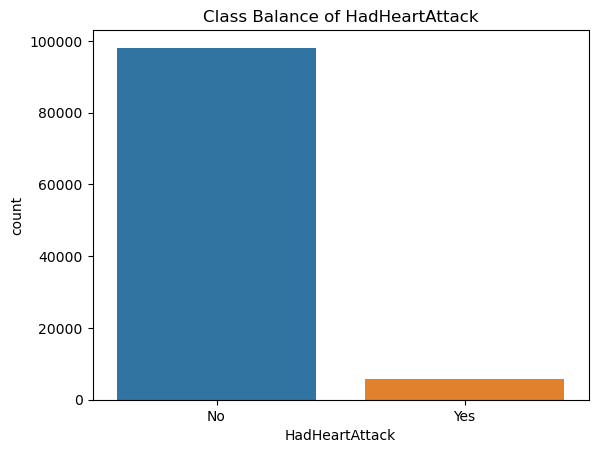

In [8]:
print(df['HadHeartAttack'].value_counts())

sns.countplot(data=df, x='HadHeartAttack')
plt.title('Class Balance of HadHeartAttack')
plt.show()


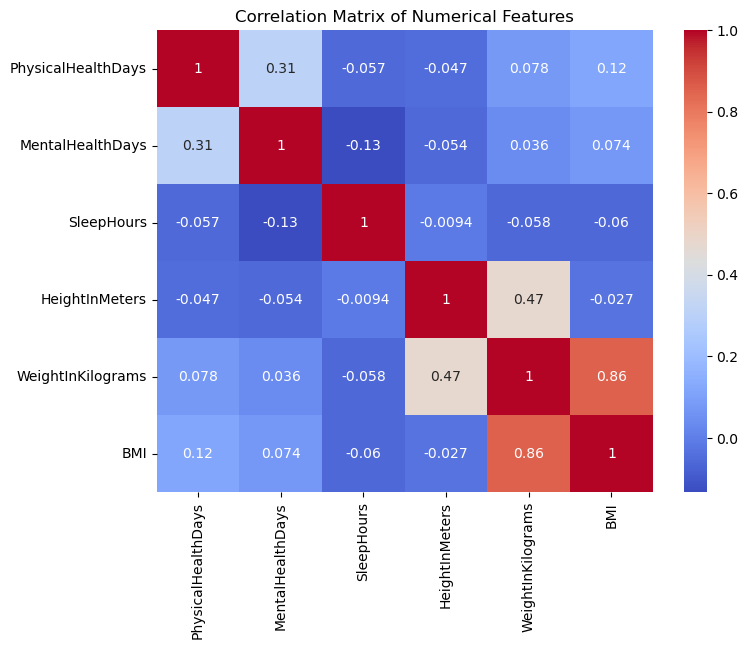

In [9]:
# correlation
corr= df[num_features].corr(method= 'pearson')
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

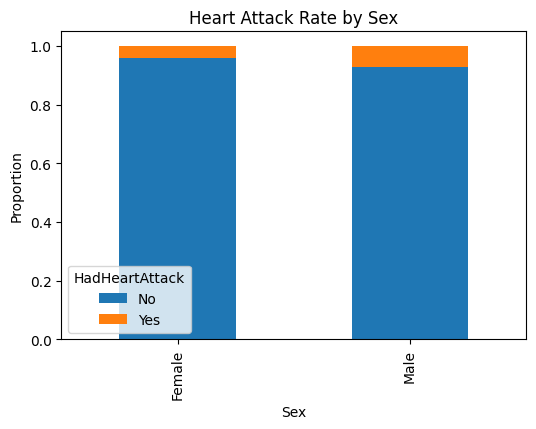

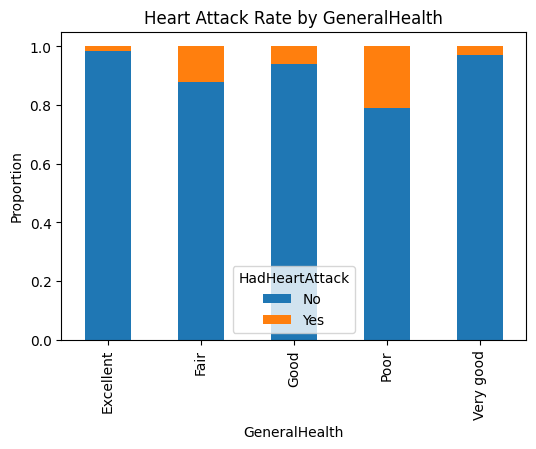

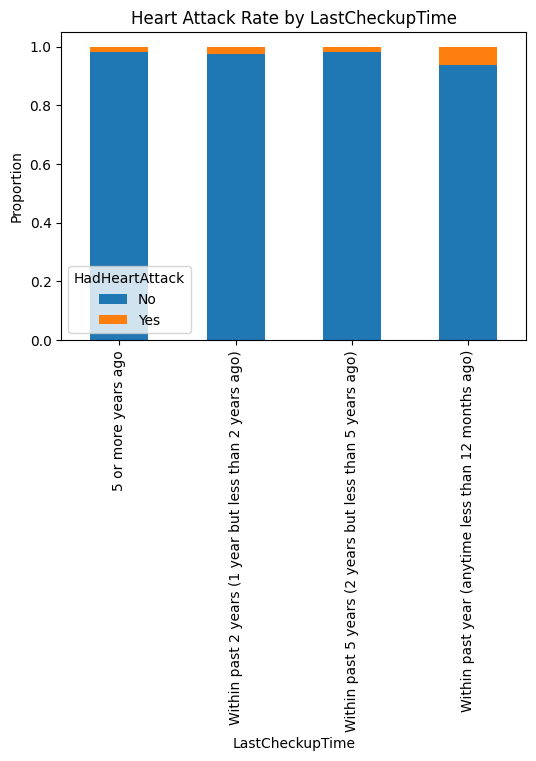

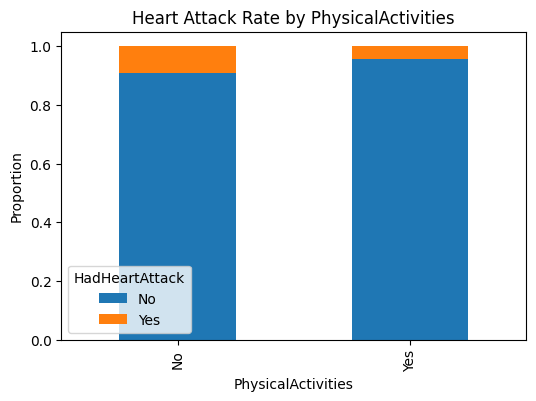

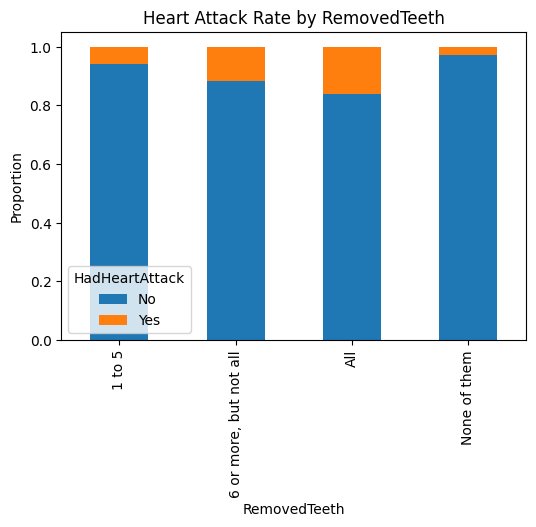

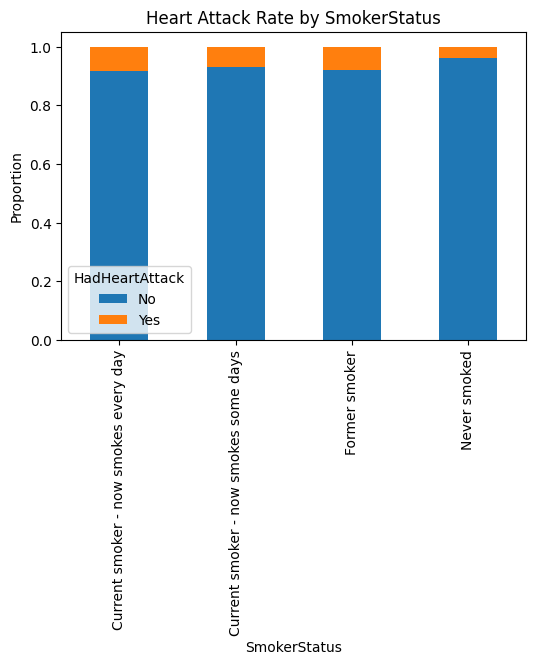

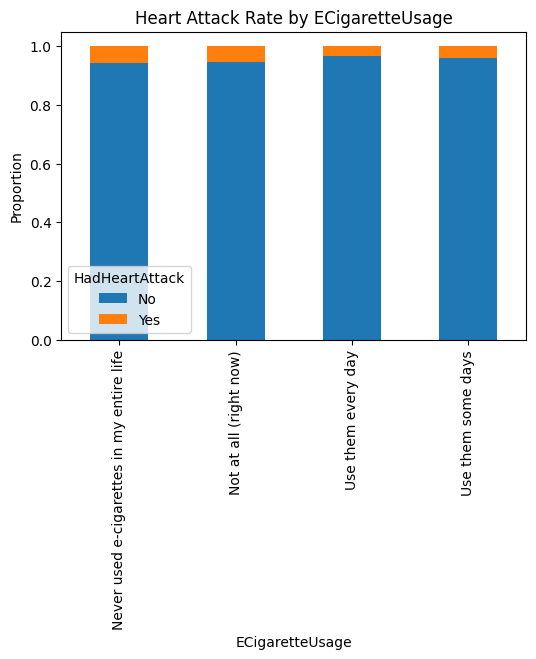

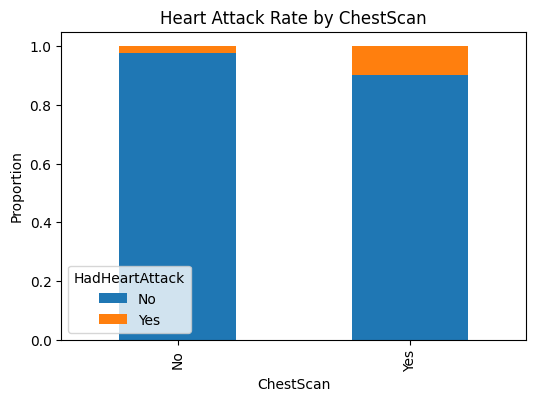

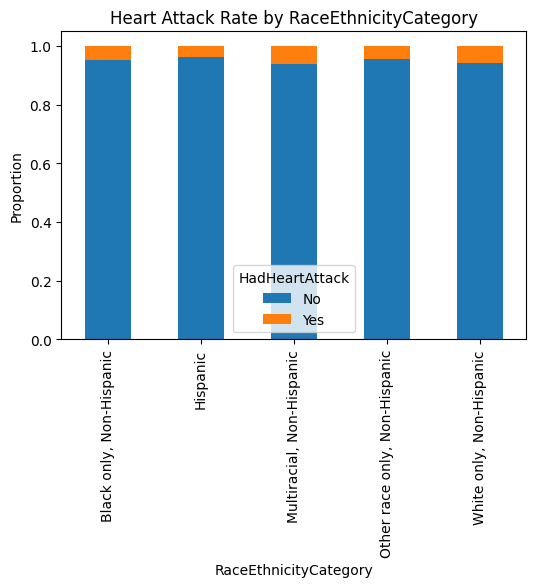

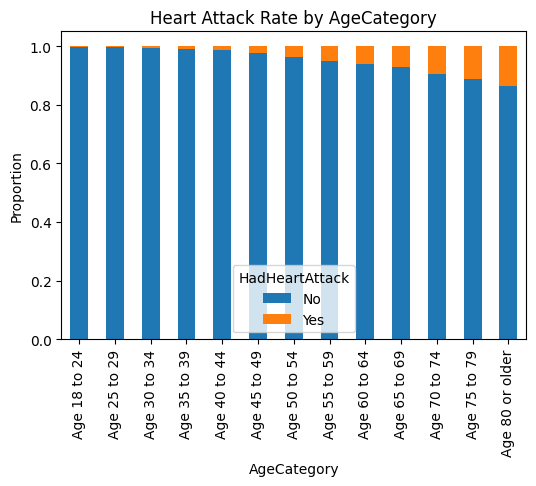

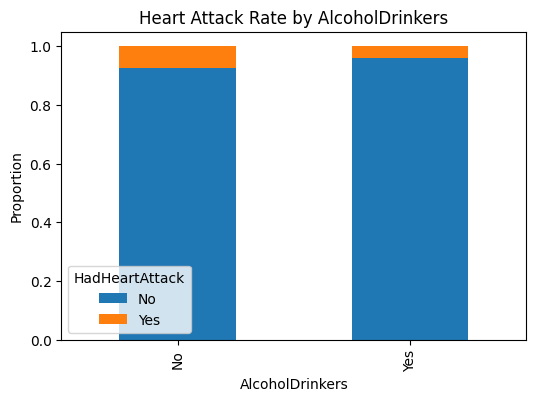

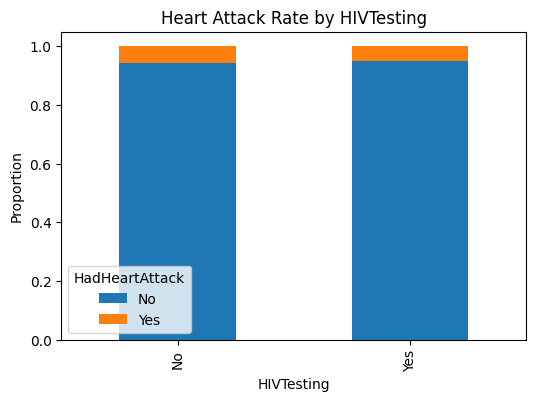

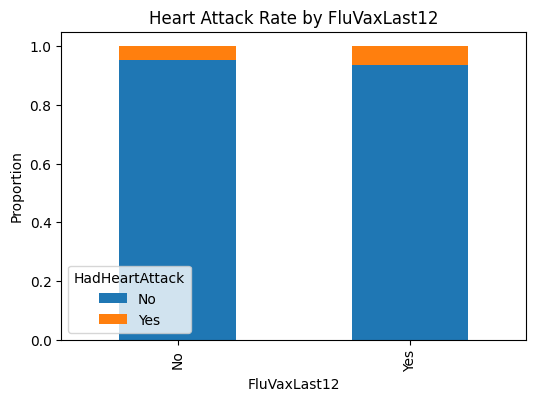

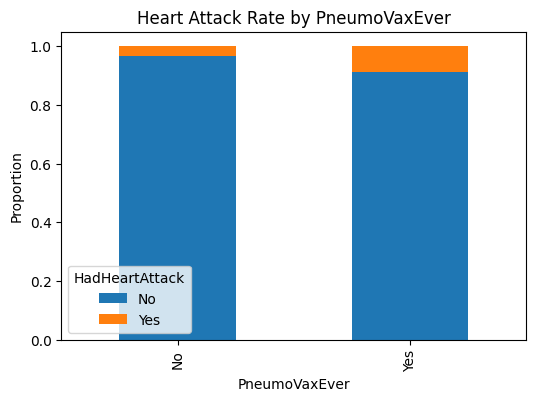

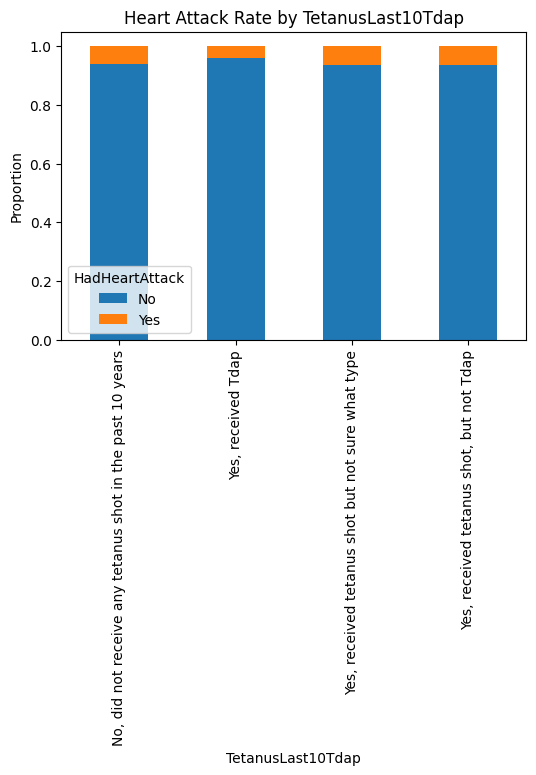

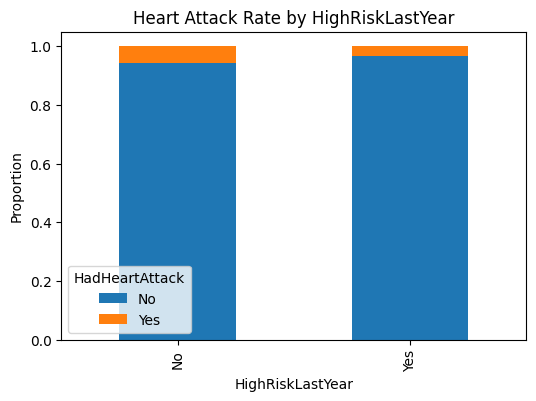

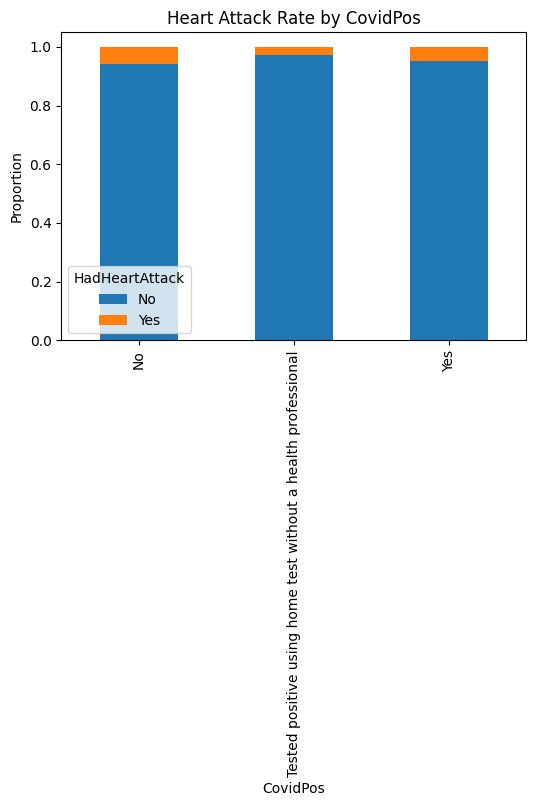

In [10]:
for feature in cat_features:
    ct = pd.crosstab(df[feature], df['HadHeartAttack'], normalize='index')  # % within each category
    ct.plot(kind='bar', stacked=True, figsize=(6,4))
    plt.title(f'Heart Attack Rate by {feature}')
    plt.ylabel('Proportion')
    plt.show()

# Data Munging and Wrangling
A lot of the data is in the form of true, false, and a lot fo the columns are object type. These need to be converted to numeric format so they can be used in a decision tree. I searched online and used a Generative AI to figure out what sort of library I could use to encode these variables and landed on LabelEncoder from sklearn. LabelEncoder assigns each unique value a number for example. true = 1, false 0 and Alabama = 1 , and HI = 50 . 

In [10]:
# Make a copy to avoid modifying original df
df_encoded = df.copy()


# Find all object columns (categorical)
object_cols = df_encoded.select_dtypes(include='object').columns
print(object_cols)
# apply yhe labelencoder to each column
le = LabelEncoder()
for col in object_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])
df_encoded = df_encoded.dropna()  
print(df_encoded.dtypes)

Index(['State', 'Sex', 'GeneralHealth', 'LastCheckupTime',
       'PhysicalActivities', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver',
       'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos'],
      dtype='object')
State                          int64
Sex                            int64
GeneralHealth                  int64
PhysicalHealthDays           float64
MentalHealthDays             float64
LastCheckupTime                int64
PhysicalActivities             int64
SleepHours                   float64
Remov

In [11]:
# now we can see if all the data is ready for a decision tree
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103836 entries, 0 to 103835
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      103836 non-null  int64  
 1   Sex                        103836 non-null  int64  
 2   GeneralHealth              103836 non-null  int64  
 3   PhysicalHealthDays         103836 non-null  float64
 4   MentalHealthDays           103836 non-null  float64
 5   LastCheckupTime            103836 non-null  int64  
 6   PhysicalActivities         103836 non-null  int64  
 7   SleepHours                 103836 non-null  float64
 8   RemovedTeeth               103836 non-null  int64  
 9   HadHeartAttack             103836 non-null  int64  
 10  HadAngina                  103836 non-null  int64  
 11  HadStroke                  103836 non-null  int64  
 12  HadAsthma                  103836 non-null  int64  
 13  HadSkinCancer              10

## Class imbalance: 
to address the class imbalance I will try and use the weight feature when creating my model 



# Simple decision tree construction 

In [12]:
# split the data into into features
# split into features and labels
X = df_encoded.drop(["HadHeartAttack"],axis = 1)
y = df_encoded["HadHeartAttack"]
# split into training and testing 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [13]:
# init and construct the decision tree
clf = DecisionTreeClassifier(criterion='gini', splitter='best', class_weight = "balanced")

In [14]:
# fit the decision tree using the training data 
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced')

In [17]:
# predict using the testing data
ypred = clf.predict(X_test)

In [21]:
# evaluate accuracy 
print("Accuracy:", accuracy_score(y_test, ypred))
print("Confusion Matrix:\n", confusion_matrix(y_test, ypred))
print("Classification Report:\n", classification_report(y_test, ypred))


Accuracy: 0.9175654853620955
Confusion Matrix:
 [[18771   845]
 [  867   285]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96     19616
           1       0.25      0.25      0.25      1152

    accuracy                           0.92     20768
   macro avg       0.60      0.60      0.60     20768
weighted avg       0.92      0.92      0.92     20768



# Result 

### precision:
The precision of class 1 ( heart disease) is 25% means that only 25% of predicted heart attacks are actually correct. i.e of all the instances predicted as heart disease only 25% of predicted heart disease cases were actually heart disease

### recall: 
The recall of class 1 is 25%, meaning out of all the positive instances of heart disease , only 25% percent were correctly identified by the model

### accuracy:
the accuracy about 92% which means the model correctly identified 92

### f1 score:
low F1 score of the minority class (heart disease), means majority class is dominating.
F1 balances the precision and recall score and provides a good metric for dealing with imbalanced datasets 

When creating a model for healthcare, recall (detection of a positice case) is one of the most important aspects, so it is necessary to build a model that will generate better recall performance. 

In order to test this, can model using random forest(ensembling) and gradient boosting, selecting the better model, the model which produces better recall and precision


## Random Forest

In [22]:
# construct random forest tree
clf_randomforest = RandomForestClassifier(class_weight='balanced', random_state=42)
# fit the decision tree using the training data 
clf_randomforest.fit(X_train,y_train)
# predict using the testing data
ypred_randomforest = clf_randomforest.predict(X_test)

In [23]:
# evaluate accuracy 
print("Accuracy:", accuracy_score(y_test, ypred_randomforest))
print("Confusion Matrix:\n", confusion_matrix(y_test, ypred_randomforest))
print("Classification Report:\n", classification_report(y_test, ypred_randomforest))

Accuracy: 0.9468412942989214
Confusion Matrix:
 [[19529    87]
 [ 1017   135]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97     19616
           1       0.61      0.12      0.20      1152

    accuracy                           0.95     20768
   macro avg       0.78      0.56      0.58     20768
weighted avg       0.93      0.95      0.93     20768



## Gradient boost

In [24]:
# construct a gradient tree
clf_gradient = GradientBoostingClassifier()
# fit the decision tree using the training data 
clf_gradient.fit(X_train,y_train)
# predict using the testing data
ypred_gradient = clf_gradient.predict(X_test)

In [25]:
# evaluate accuracy 
print("Accuracy:", accuracy_score(y_test, ypred_gradient))
print("Confusion Matrix:\n", confusion_matrix(y_test, ypred_gradient))
print("Classification Report:\n", classification_report(y_test, ypred_gradient))

Accuracy: 0.9481413713405239
Confusion Matrix:
 [[19398   218]
 [  859   293]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97     19616
           1       0.57      0.25      0.35      1152

    accuracy                           0.95     20768
   macro avg       0.77      0.62      0.66     20768
weighted avg       0.94      0.95      0.94     20768



# Conclusion:

Both of the models improved upon the base decision tree slightly.

The Random Forest had a recall of about 0.12, lower than the base tree, and precision of 0.61, more than double of the base tree.

The Gradient Boosting model has a recall of 0.25 and a precision score of 0.57, also more than doubled from the base tree.

From these models I would conlude that the Gradient boosting model is better because it is more balanced, Random Forest is more precise but since it has very low recall it will miss many heart attacks.



however this is still not ideal especially for medical predictions, since the model is only detecting 25% people who had a heart disease. In this type of model we want to catch as many heart attacks as possible and we need to find a model with higher sensitivity ( recall )

## Improving the model further 
We can address the class imablance using SMOTE in order to perform oversampling (increases the instances of minority classes), in order to try and achieve a higher recall and precision



In [27]:
# use smote to oversample
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

# constructing a simple decision tree, a random forest, and gradient boost with oversampling

## simple decision tree

In [28]:
# init and construct the decision tree
clf = DecisionTreeClassifier(criterion='gini', splitter='best', class_weight = "balanced")
# fit the decision tree using the oversampled data
clf.fit(X_res, y_res)
# predict using the testing data
ypred = clf.predict(X_test)
# evaluate accuracy 
print("Accuracy:", accuracy_score(y_test, ypred))
print("Confusion Matrix:\n", confusion_matrix(y_test, ypred))
print("Classification Report:\n", classification_report(y_test, ypred))

Accuracy: 0.8708590138674884
Confusion Matrix:
 [[17661  1955]
 [  727   425]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.90      0.93     19616
           1       0.18      0.37      0.24      1152

    accuracy                           0.87     20768
   macro avg       0.57      0.63      0.59     20768
weighted avg       0.92      0.87      0.89     20768



## random forest decision tree

In [29]:
# construct random forest tree
clf_randomforest = RandomForestClassifier(class_weight='balanced', random_state=42)
# fit the decision tree using the training data 
clf_randomforest.fit(X_res, y_res)
# predict using the testing data
ypred_randomforest = clf_randomforest.predict(X_test)
# evaluate accuracy 
print("Accuracy:", accuracy_score(y_test, ypred_randomforest))
print("Confusion Matrix:\n", confusion_matrix(y_test, ypred_randomforest))
print("Classification Report:\n", classification_report(y_test, ypred_randomforest))

Accuracy: 0.9276290446841294
Confusion Matrix:
 [[18878   738]
 [  765   387]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96     19616
           1       0.34      0.34      0.34      1152

    accuracy                           0.93     20768
   macro avg       0.65      0.65      0.65     20768
weighted avg       0.93      0.93      0.93     20768



## gradient boost


In [30]:
# construct a gradient tree
clf_gradient = GradientBoostingClassifier()
# fit the decision tree using the training data 
clf_gradient.fit(X_res, y_res)
# predict using the testing data
ypred_gradient = clf_gradient.predict(X_test)
# evaluate accuracy 
print("Accuracy:", accuracy_score(y_test, ypred_gradient))
print("Confusion Matrix:\n", confusion_matrix(y_test, ypred_gradient))
print("Classification Report:\n", classification_report(y_test, ypred_gradient))

Accuracy: 0.9057203389830508
Confusion Matrix:
 [[18266  1350]
 [  608   544]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.93      0.95     19616
           1       0.29      0.47      0.36      1152

    accuracy                           0.91     20768
   macro avg       0.63      0.70      0.65     20768
weighted avg       0.93      0.91      0.92     20768



# Conclusions
Accuracy dropped slightly — expected with SMOTE since the model now sees more minority samples

Recall for heart attack cases almost doubled, from 26% → 47%. This means the model is catching twice as many true positive heart attack cases.

Precision dropped, which means more false positives, but this is often a worthwhile tradeoff in medical applications, where missing a true positive is worse than raising a false alarm.

Among the three models Gradient Boosting with SMOTE performed the best balance of recall and precision

# HyperParameter tuning to improve the model 

We can now attempt to optimize the Gradient Boosting with SMOTE model even further using hyperparameter tuning.

# can optimize:

### learning_rate: shrinks the contribution of each tree. step size

### n_estimators: the num of boosting stages to perform (large num usually results in better performance)

### Min_samples_split: min num of samples required to split an internal node

### max_depth: max depth of each individual tree. controls tree complexity. 

### Min_samples_leaf: min num of samples required to be at a leaf node, reduces overfitting 


- Depth and number of estimators control bias vs variance

- tree depth will control overfitting vs underfitting 

- learning rate can control speed vs accuracy


In [34]:
# use GridSearchCV to tune model 
# parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'min_samples_split': [2, 5, 10]
}
# call grid seach 
grid = GridSearchCV(
    estimator=GradientBoostingClassifier(),
    param_grid=param_grid,
    scoring='recall',  # focus on recall
    cv=5,
    n_jobs=-1,
    verbose=2
    
)
# fit on the SMOTE data 
grid.fit(X_res,y_res)

# best params
print("Best parameters:", grid.best_params_)

# evaluate on the test data 
# evaluate on test data
best_model = grid.best_estimator_
y_pred_best = best_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
print("Classification Report:\n", classification_report(y_test, y_pred_best))

Fitting 5 folds for each of 81 candidates, totalling 405 fits


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


KeyboardInterrupt: 

In [ ]:
# best params
print("Best parameters:", grid.best_params_)

# evaluate on the test data 
# evaluate on test data
best_model = grid.best_estimator_
y_pred_best = best_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
print("Classification Report:\n", classification_report(y_test, y_pred_best))

# Results/ Discussion


# Conclusion